In [44]:
library(ggplot2)
library(reshape2)

In [45]:
data=read.table("gecco.snps.cox15.svm.scores.txt",header=TRUE,sep='\t')

In [46]:
subset_data=subset(data,select=c('SNP','colo205.REF',
             'colo205.ALT',
             'hct116.REF',
             'hct116.ALT',
             'sw480.REF',
             'sw480.ALT',
             'dnase_c.REF',
             'dnase_c.ALT',
             'dnase_v.REF',
             'dnase_v.ALT'))

In [47]:
m=melt(subset_data)

Using SNP as id variables



In [48]:
m

SNP,variable,value
<fct>,<fct>,<dbl>
rs4919352,colo205.REF,-0.220
rs4917872,colo205.REF,-0.925
rs141318981,colo205.REF,-1.478
rs4381310,colo205.REF,-2.829
rs4366420,colo205.REF,-2.188
rs2862655,colo205.REF,-1.859
rs7912642,colo205.REF,-1.865
rs9783136,colo205.REF,-2.753
rs9783252,colo205.REF,-2.274


In [49]:
library(dplyr)
library(tidyr)
m2=separate(data = m, col = variable, into = c("model", "allele"), sep = "\\.")


In [50]:
m3=dcast(m2, SNP + model~ allele)

In [51]:
head(m3)

,SNP,model,ALT,REF
,<fct>,<chr>,<dbl>,<dbl>
1,rs1035209,colo205,-0.252,-0.274
2,rs1035209,dnase_c,0.011,0.045
3,rs1035209,dnase_v,-0.377,-0.245
4,rs1035209,hct116,-0.888,-0.720
5,rs1035209,sw480,-0.690,-0.668
6,rs1035213,colo205,-1.321,-1.434


In [52]:
m3$label=""
m3$label[m3$SNP=="rs11190164"]="rs11190164"
m3$label[m3$SNP=="rs1318920"]="rs1318920"
m3$label[m3$SNP=="rs2300985"]="rs2300985"

In [53]:
head(m3)

,SNP,model,ALT,REF,label
,<fct>,<chr>,<dbl>,<dbl>,<chr>
1,rs1035209,colo205,-0.252,-0.274,
2,rs1035209,dnase_c,0.011,0.045,
3,rs1035209,dnase_v,-0.377,-0.245,
4,rs1035209,hct116,-0.888,-0.720,
5,rs1035209,sw480,-0.690,-0.668,
6,rs1035213,colo205,-1.321,-1.434,


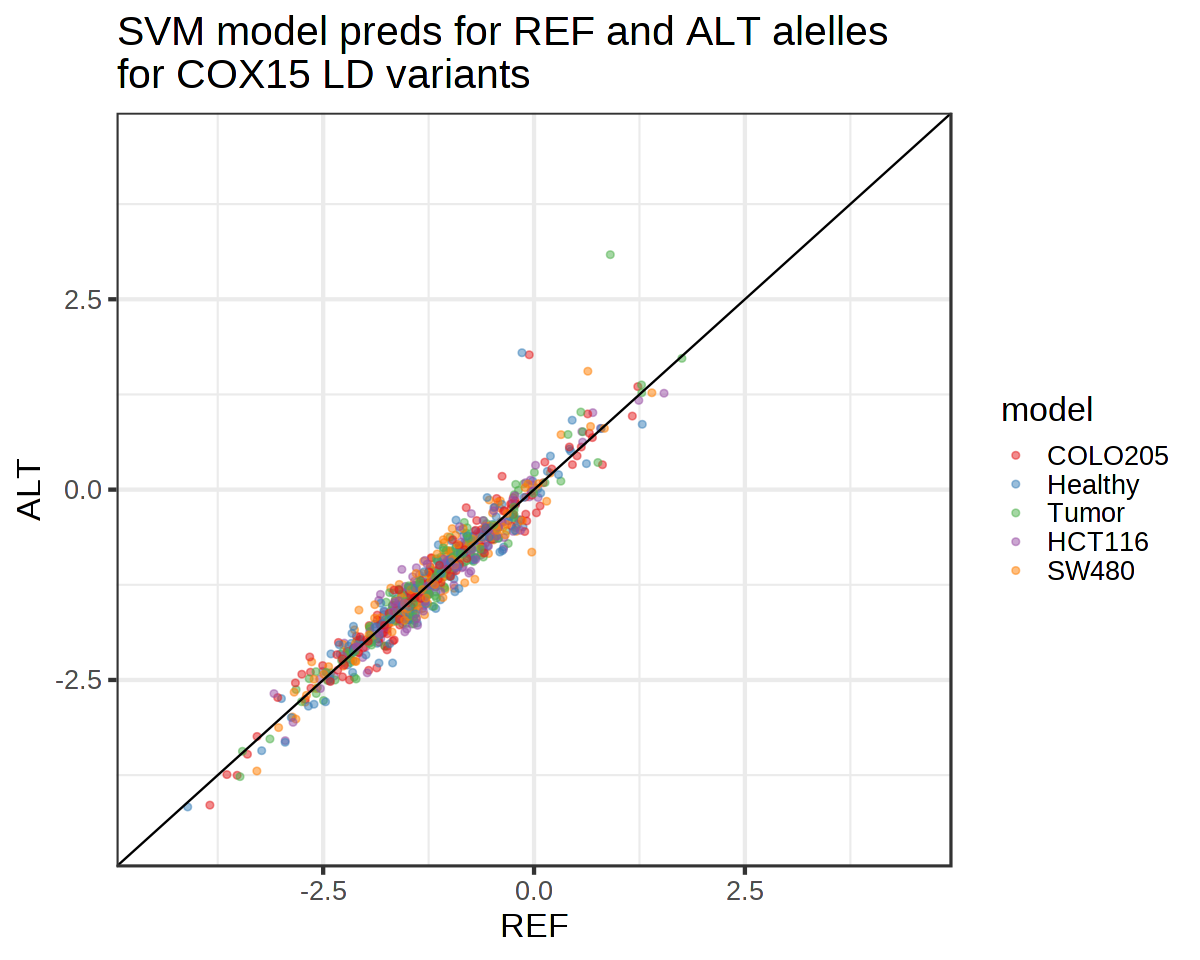

In [65]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data=m3,
      aes(x=REF,
         y=ALT,
         group=model,
         color=model,
         label=label))+
geom_point(alpha=0.5)+
geom_abline()+
xlim(-4.5,4.5)+
ylim(-4.5,4.5)+
theme_bw(20)+
ggtitle("SVM model preds for REF and ALT alelles\nfor COX15 LD variants")+
scale_color_manual(values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'),labels=c("COLO205","Healthy","Tumor","HCT116","SW480"))

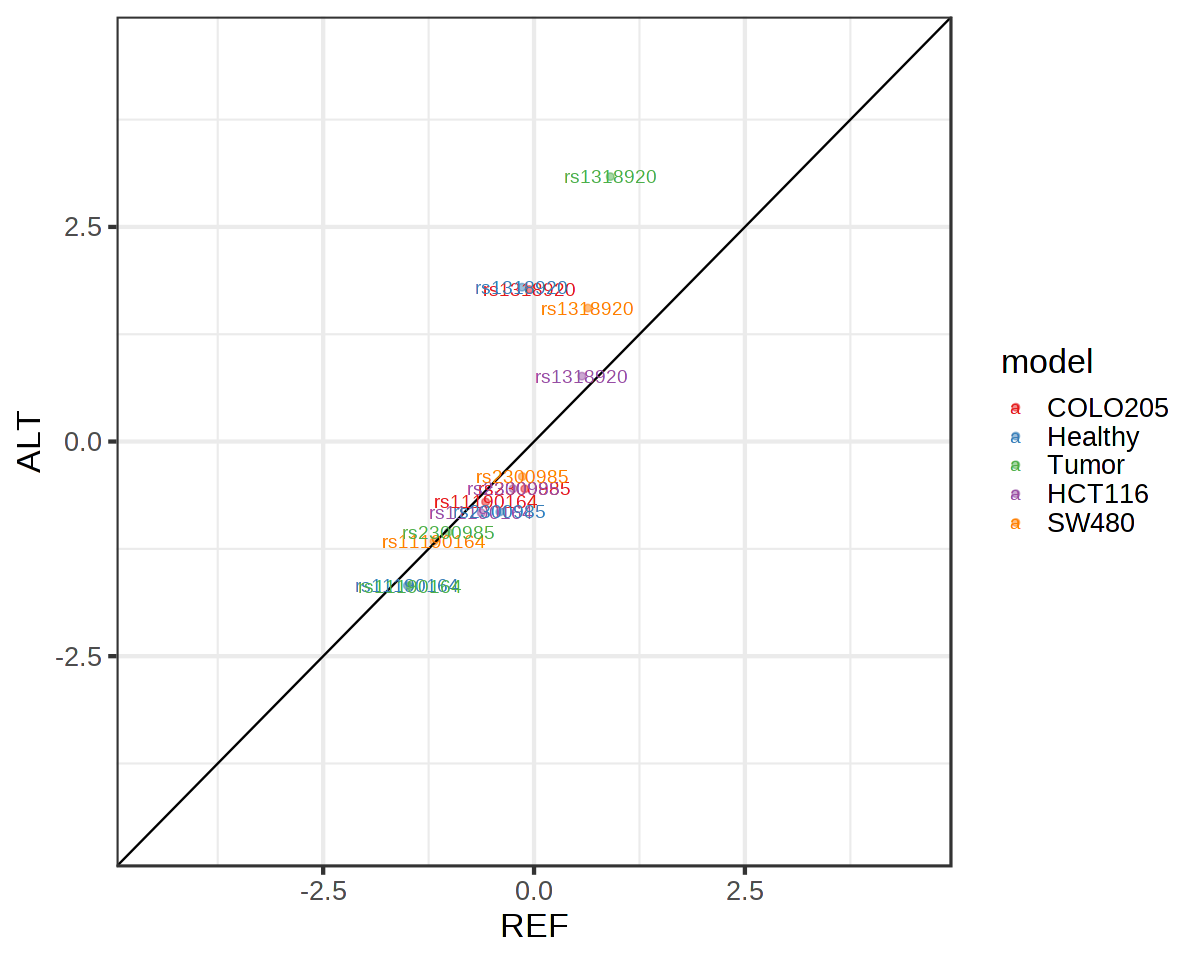

In [62]:
m4=m3[m3$label!="",]
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data=m4,
      aes(x=REF,
         y=ALT,
         group=model,
         color=model,
         label=label))+
geom_point(alpha=0.5)+
geom_abline()+
geom_text()+
xlim(-4.5,4.5)+
ylim(-4.5,4.5)+
theme_bw(20)+
scale_color_manual(values=c('#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'),labels=c("COLO205","Healthy","Tumor","HCT116","SW480"))